# Objectif :

- Comprendre du mieux possible nos données en vue de la prédiction d'une maladie cardiaque 


# Analyse de Forme :

- **variable target** : COEUR : maladie cardiaque 1 : Présence de la maladie, 0 : Absence de la maladie
- **Structure** : Le dataset contient 918 examples et 12 variables
- **types de variables** : qualitatives : 5, quantitatives : 7
- **Analyse des valeurs** : Aucune valeur nulle , aucune constante 


# Analyse de Fond :

## Analyse des features 2 à 2 : 

- **Cas des valeurs quantitatives** :

- **Cas des valeurs qualitatives** :

- **Test de corrélations**: Odds ratio (Rapport de chance ou risque relatif rapproché) ,  coeff de relation lineaire , risque de contingence ...

- **Analyse des variables vs la variable cible** : 

- **Autres tests** : 

In [3]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [221]:
data = pd.read_excel('heart.xlsx')
data.head()

,AGE,SEXE,TDT,PAR,CHOLESTEROL,GAJ,ECG,FCMAX,ANGINE,DEPRESSION,PENTE,CŒUR
0,40,homme,AA,140,289,0,Normal,172,Non,0.0,Ascendant,0
1,49,femme,DNA,160,180,0,Normal,156,Non,1.0,Plat,1
2,37,homme,AA,130,283,0,ST,98,Non,0.0,Ascendant,0
3,48,femme,ASY,138,214,0,Normal,108,Oui,1.5,Plat,1
4,54,homme,DNA,150,195,0,Normal,122,Non,0.0,Ascendant,0


## Présentation du dataset

In [19]:
print(f'Le dataset contient {data.shape[0]} examples et {data.shape[1]} variables')

Le dataset contient 918 examples et 12 variables


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   AGE          918 non-null    int64  
 1   SEXE         918 non-null    object 
 2   TDT          918 non-null    object 
 3   PAR          918 non-null    int64  
 4   CHOLESTEROL  918 non-null    int64  
 5   GAJ          918 non-null    int64  
 6   ECG          918 non-null    object 
 7   FCMAX        918 non-null    int64  
 8   ANGINE       918 non-null    object 
 9   DEPRESSION   918 non-null    float64
 10  PENTE        918 non-null    object 
 11  CŒUR         918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [21]:
missing_rate = data.isna().sum()
missing_rate

AGE            0
SEXE           0
TDT            0
PAR            0
CHOLESTEROL    0
GAJ            0
ECG            0
FCMAX          0
ANGINE         0
DEPRESSION     0
PENTE          0
CŒUR           0
dtype: int64

In [28]:
data.rename(columns={'DEPRESSION ': 'DEPRESSION'}, inplace=True) # inplace modifie le data en laissant sa structure en <<en place>> dans le meme objet

0      0.0
1      1.0
2      0.0
3      1.5
4      0.0
      ... 
913    1.2
914    3.4
915    1.2
916    0.0
917    0.0
Name: DEPRESSION, Length: 918, dtype: float64

In [119]:
data.rename(columns={'CŒUR': 'COEUR'}, inplace=True) 

In [29]:
data.nunique() 

AGE             50
SEXE             2
TDT              4
PAR             67
CHOLESTEROL    222
GAJ              2
ECG              3
FCMAX          119
ANGINE           2
DEPRESSION      53
PENTE            3
CŒUR             2
dtype: int64

### Variables Quantitatives 

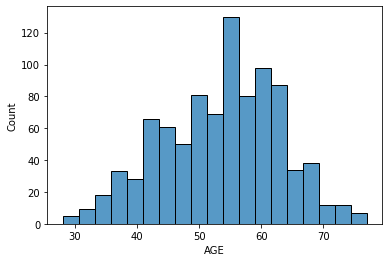

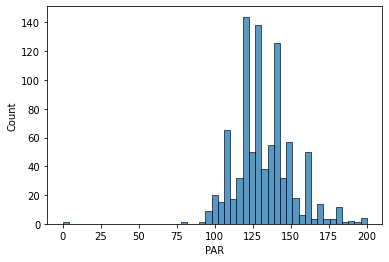

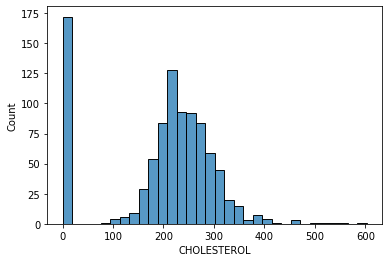

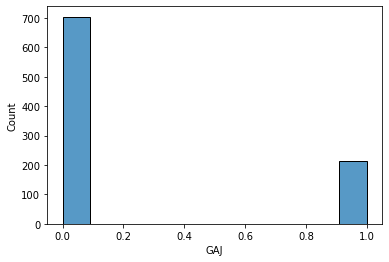

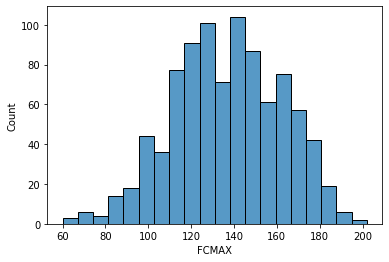

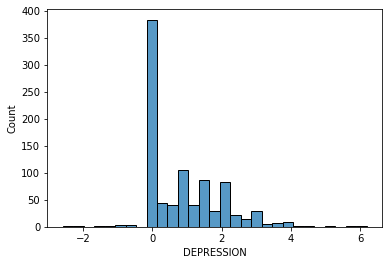

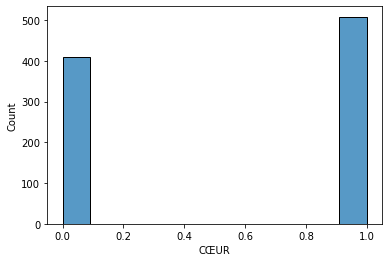

In [31]:
for col in data.select_dtypes(np.number):
    plt.figure()
    sns.histplot(data[col])

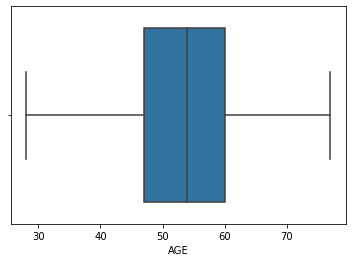

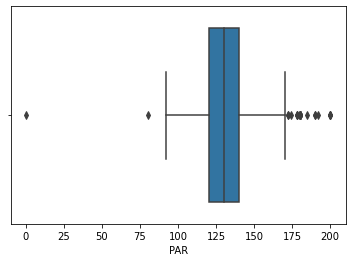

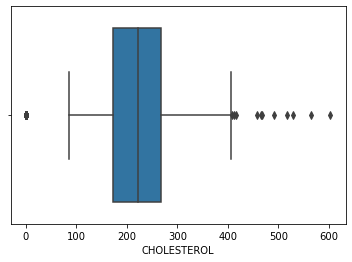

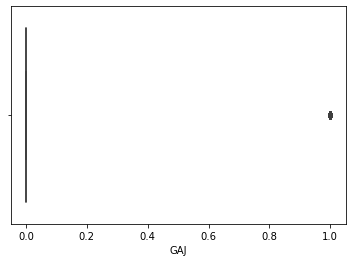

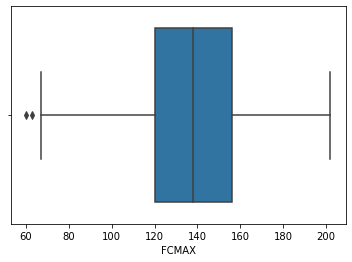

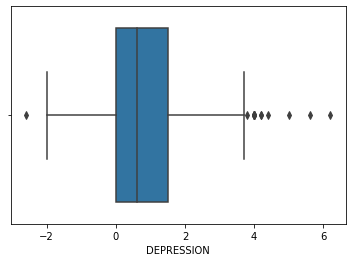

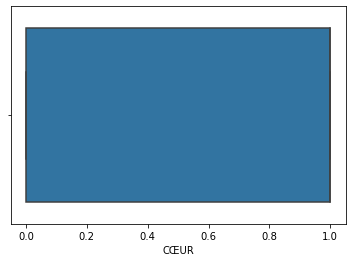

In [30]:
for col in data.select_dtypes(np.number):
    plt.figure()
    sns.boxplot(data[col])

### Variables qualitatives

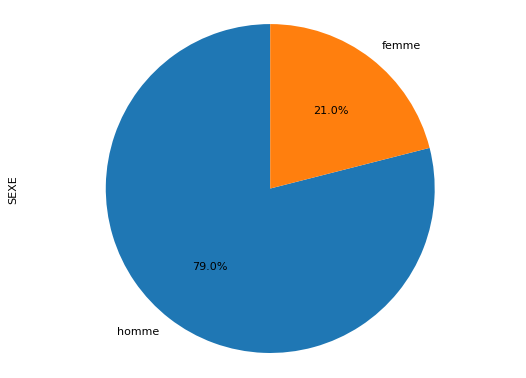

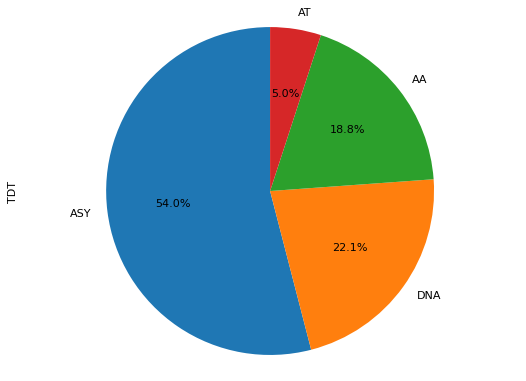

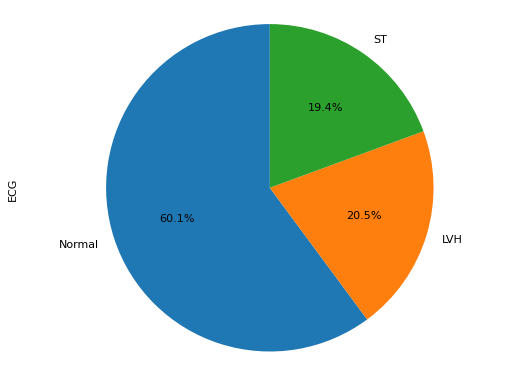

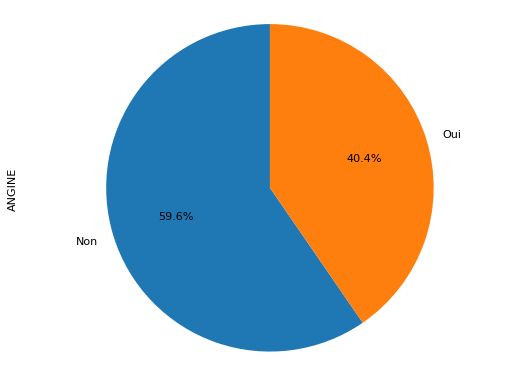

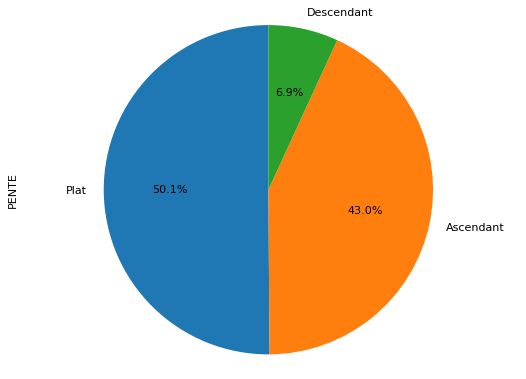

In [46]:
from matplotlib.pyplot import figure
for col_names in col :
    plt.figure(figsize=(8,6), dpi=80) 
    data[col_names].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
    plt.axis('equal')
    plt.show()

### Analyse 2 à 2 des variables :

### Variable quantitative vs Variable quantitative

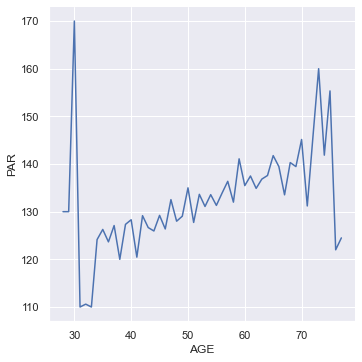

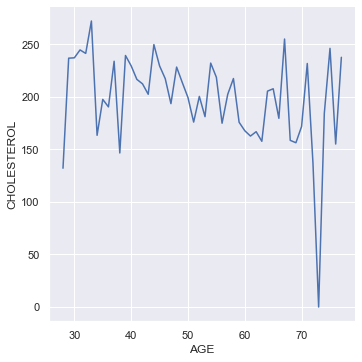

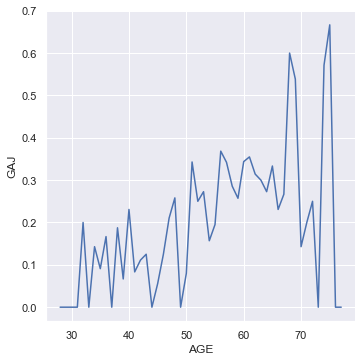

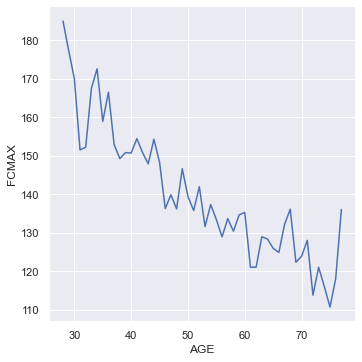

In [166]:
sns.relplot(x="AGE", y="PAR",kind="line", data=data , ci=None);
sns.relplot(x="AGE", y="CHOLESTEROL",kind="line", data=data , ci=None);
sns.relplot(x="AGE", y="GAJ",kind="line", data=data , ci=None);
sns.relplot(x="AGE", y="FCMAX",kind="line", data=data , ci=None);

In [153]:
import scipy.stats as st
import numpy as np

print(st.pearsonr(data["AGE"],data["PAR"])[0])
# print(np.cov(data["AGE"],data["PAR"],ddof=0)[1,0])

0.25439935615154474


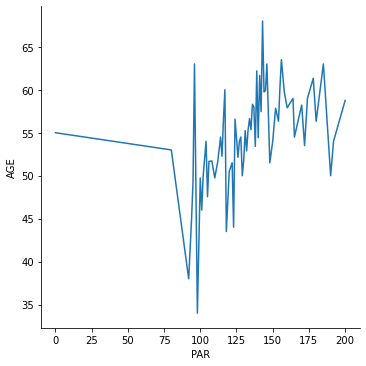

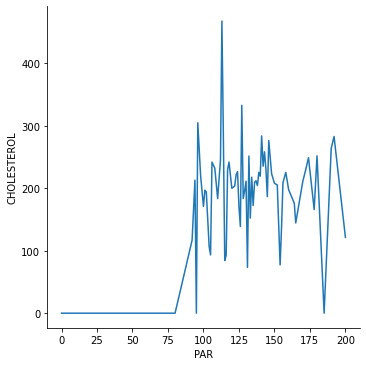

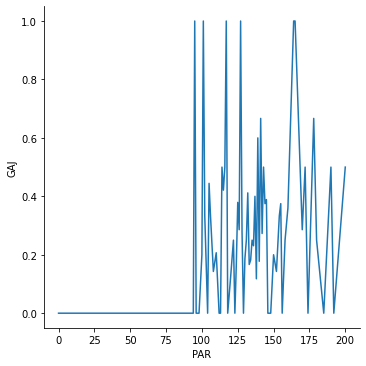

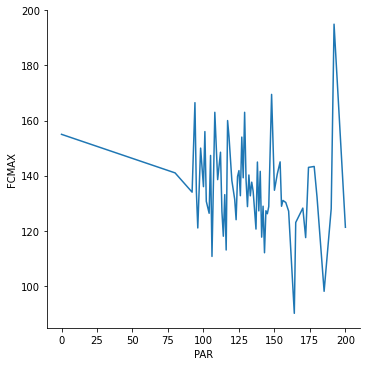

In [36]:
sns.relplot(x="PAR", y="AGE",kind="line", data=data , ci=None);
sns.relplot(x="PAR", y="CHOLESTEROL",kind="line", data=data , ci=None);
sns.relplot(x="PAR", y="GAJ",kind="line", data=data , ci=None);
sns.relplot(x="PAR", y="FCMAX",kind="line", data=data , ci=None);

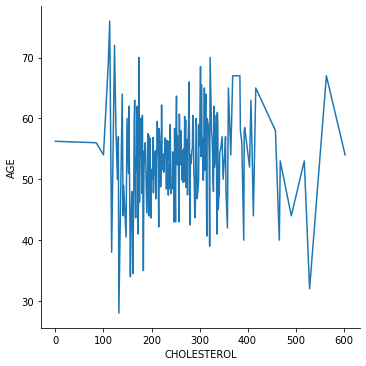

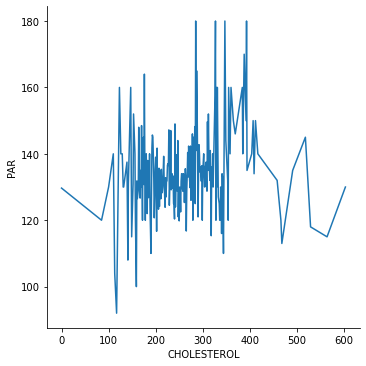

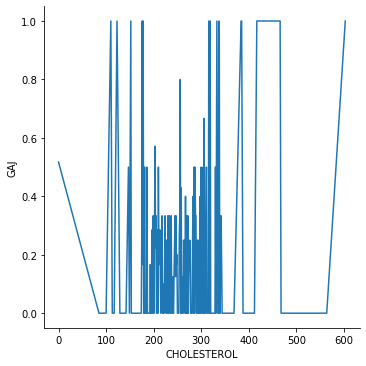

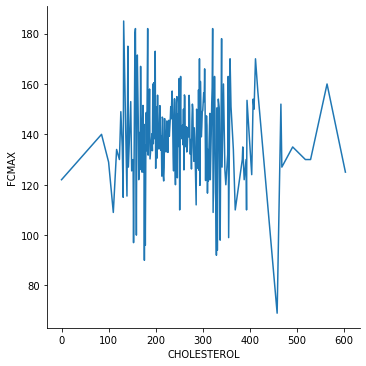

In [37]:
sns.relplot(x="CHOLESTEROL", y="AGE",kind="line", data=data , ci=None);
sns.relplot(x="CHOLESTEROL", y="PAR",kind="line", data=data , ci=None);
sns.relplot(x="CHOLESTEROL", y="GAJ",kind="line", data=data , ci=None);
sns.relplot(x="CHOLESTEROL", y="FCMAX",kind="line", data=data , ci=None);

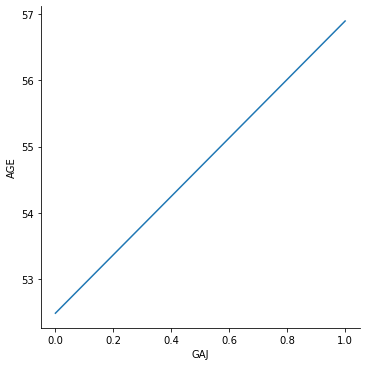

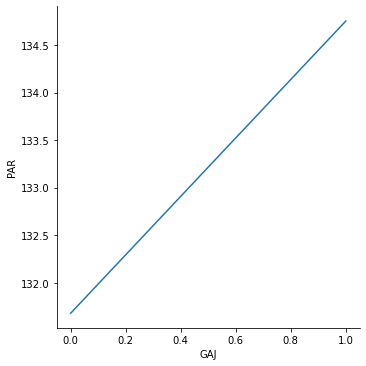

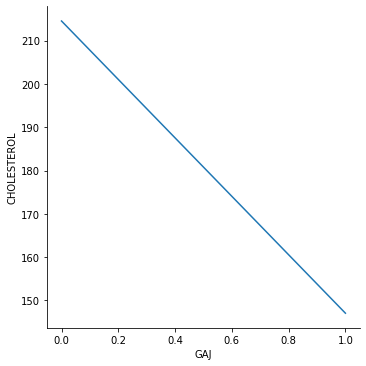

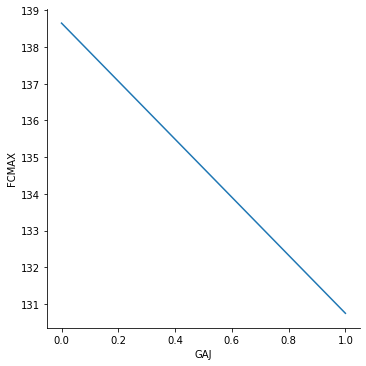

In [38]:
sns.relplot(x="GAJ", y="AGE",kind="line", data=data , ci=None);
sns.relplot(x="GAJ", y="PAR",kind="line", data=data , ci=None);
sns.relplot(x="GAJ", y="CHOLESTEROL",kind="line", data=data , ci=None);
sns.relplot(x="GAJ", y="FCMAX",kind="line", data=data , ci=None);

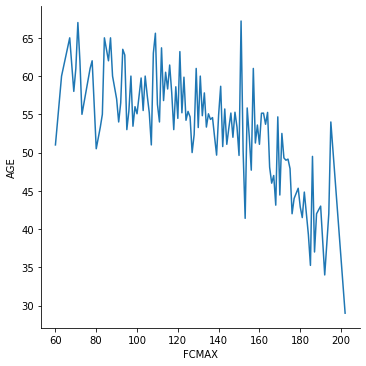

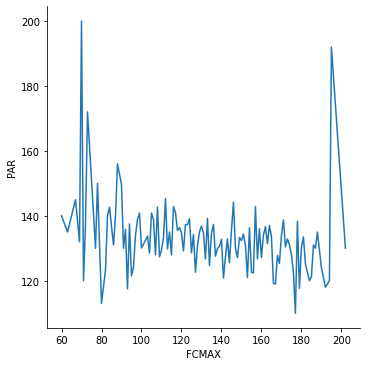

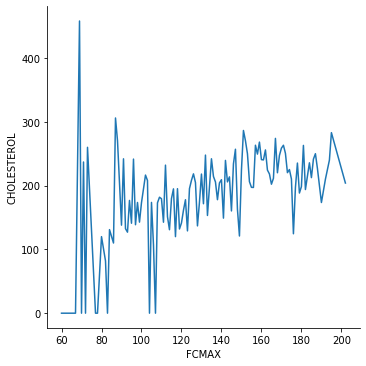

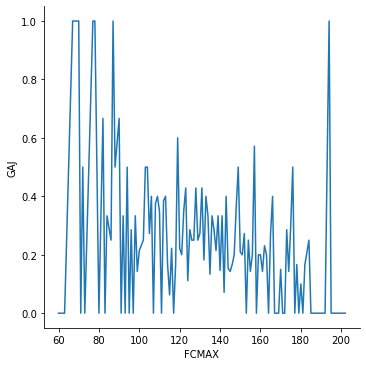

In [39]:
sns.relplot(x="FCMAX", y="AGE",kind="line", data=data , ci=None);
sns.relplot(x="FCMAX", y="PAR",kind="line", data=data , ci=None);
sns.relplot(x="FCMAX", y="CHOLESTEROL",kind="line", data=data , ci=None);
sns.relplot(x="FCMAX", y="GAJ",kind="line", data=data , ci=None);

In [155]:
from scipy.stats import pearsonr

In [156]:
pearsonr(data['AGE'],data['PAR'])

(0.25439935615154474, 5.0147697437822694e-15)

In [157]:
pearsonr(data['AGE'],data['CHOLESTEROL'])

(-0.09528177118121897, 0.0038580710435994576)

In [159]:
pearsonr(data['AGE'],data['GAJ'])

(0.1980390658667439, 1.4292211259812479e-09)

In [158]:
pearsonr(data['AGE'],data['FCMAX'])

(-0.3820446750319706, 2.8411217807772657e-33)

### Variables qualitatives VS Variables quantitatives

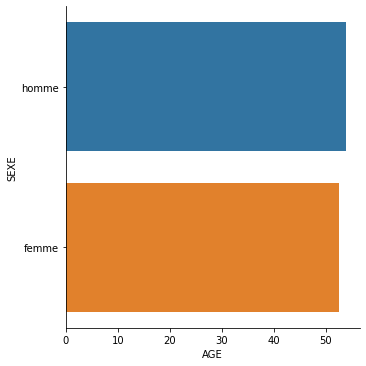

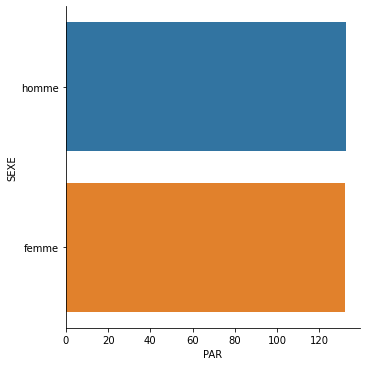

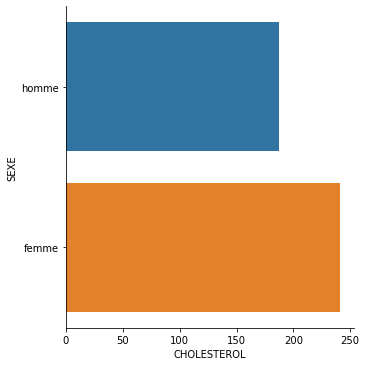

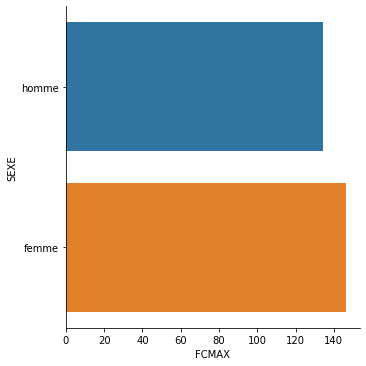

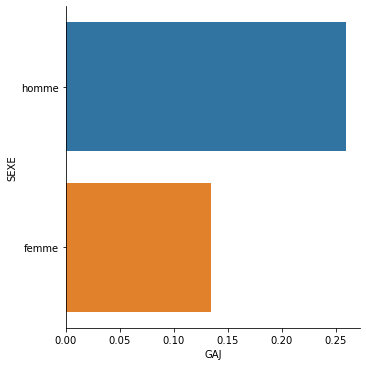

In [71]:
sns.catplot(x="AGE", y="SEXE", kind="bar", data=data, ci=None, orient= 'h')
sns.catplot(x="PAR", y="SEXE", kind="bar", data=data, ci=None)
sns.catplot(x="CHOLESTEROL", y="SEXE", kind="bar", data=data, ci=None)
sns.catplot(x="FCMAX", y="SEXE", kind="bar", data=data, ci=None)
sns.catplot(x="GAJ", y="SEXE", kind="bar", data=data, ci=None)
plt.show()

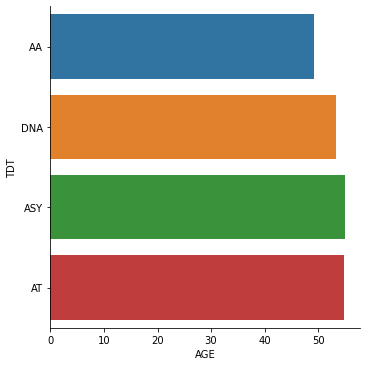

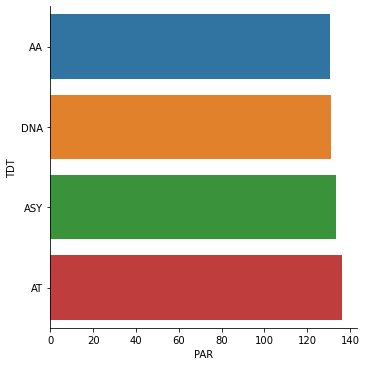

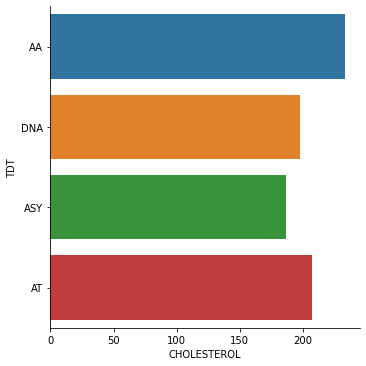

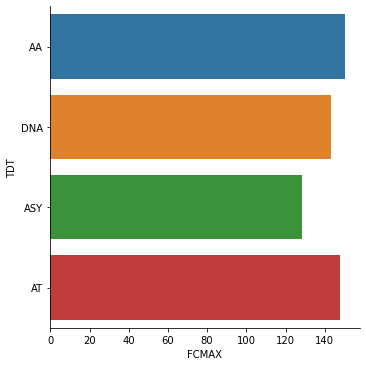

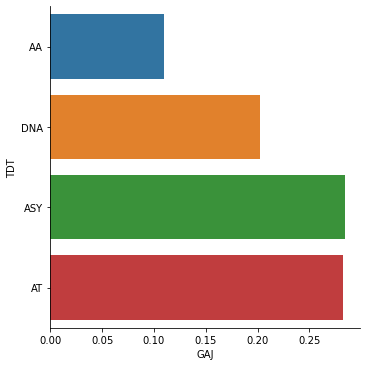

In [67]:
sns.catplot(x="AGE", y="TDT", kind="bar", data=data, ci=None)
sns.catplot(x="PAR", y="TDT", kind="bar", data=data, ci=None)
sns.catplot(x="CHOLESTEROL", y="TDT", kind="bar", data=data, ci=None)
sns.catplot(x="FCMAX", y="TDT", kind="bar", data=data, ci=None)
sns.catplot(x="GAJ", y="TDT", kind="bar", data=data, ci=None)
plt.show()

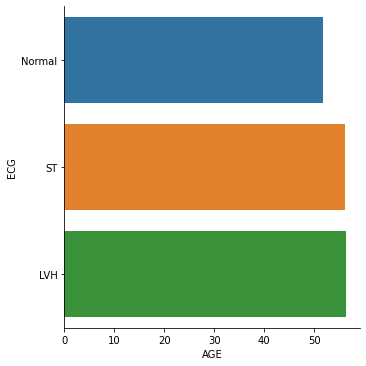

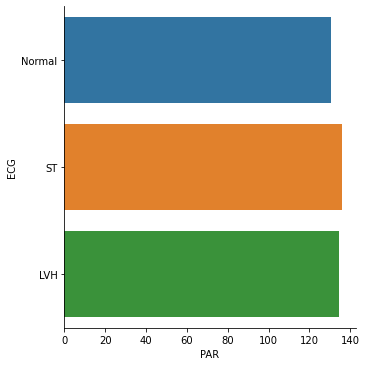

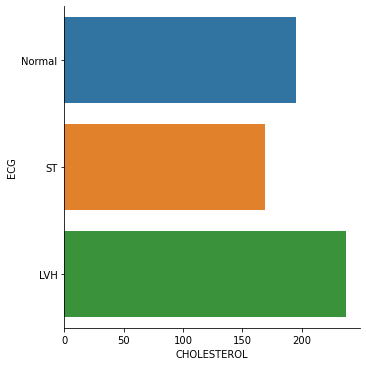

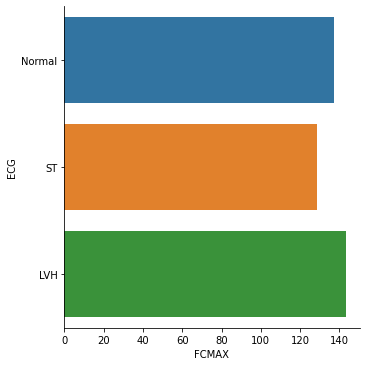

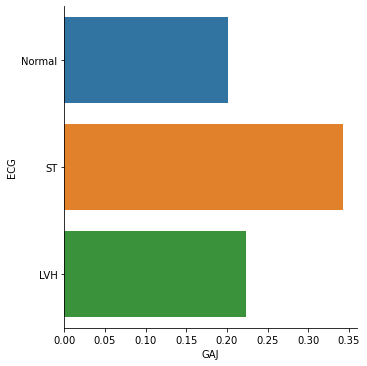

In [72]:
sns.catplot(x="AGE", y="ECG", kind="bar", data=data, ci=None)
sns.catplot(x="PAR", y="ECG", kind="bar", data=data, ci=None)
sns.catplot(x="CHOLESTEROL", y="ECG", kind="bar", data=data, ci=None)
sns.catplot(x="FCMAX", y="ECG", kind="bar", data=data, ci=None)
sns.catplot(x="GAJ", y="ECG", kind="bar", data=data, ci=None)
plt.show()

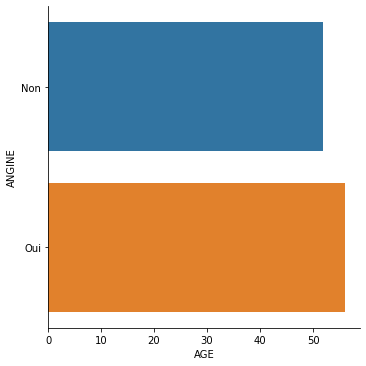

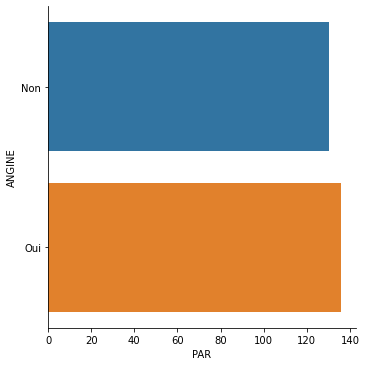

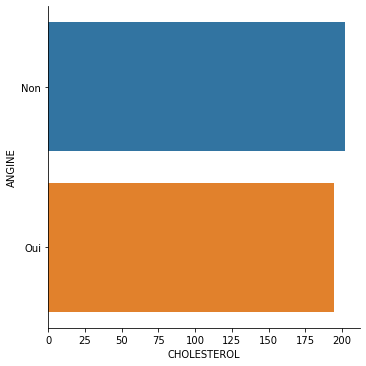

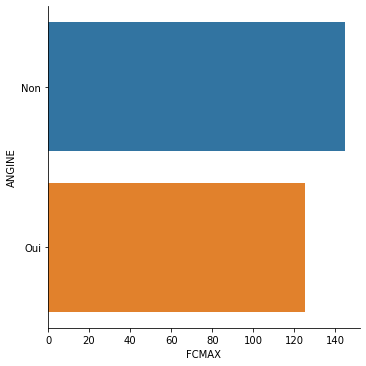

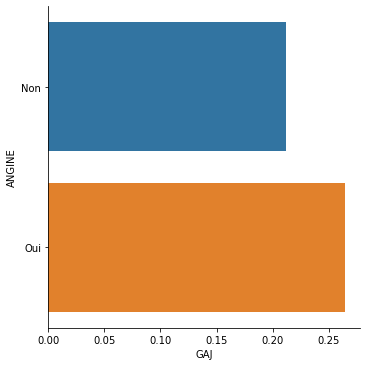

In [73]:
sns.catplot(x="AGE", y="ANGINE", kind="bar", data=data, ci=None)
sns.catplot(x="PAR", y="ANGINE", kind="bar", data=data, ci=None)
sns.catplot(x="CHOLESTEROL", y="ANGINE", kind="bar", data=data, ci=None)
sns.catplot(x="FCMAX", y="ANGINE", kind="bar", data=data, ci=None)
sns.catplot(x="GAJ", y="ANGINE", kind="bar", data=data, ci=None)
plt.show()

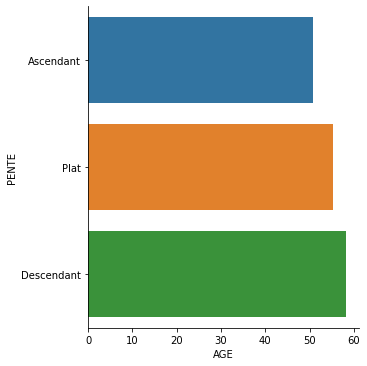

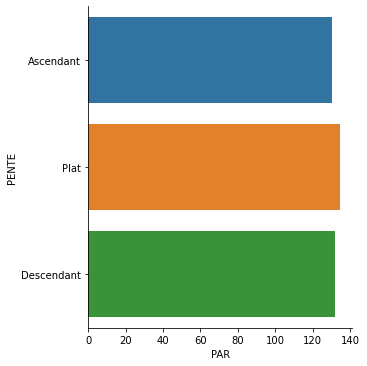

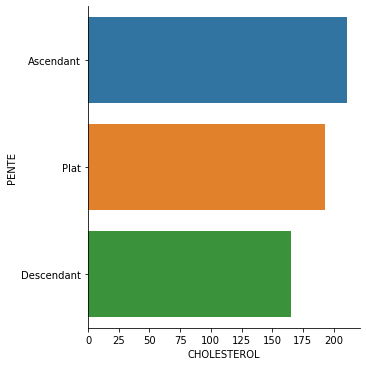

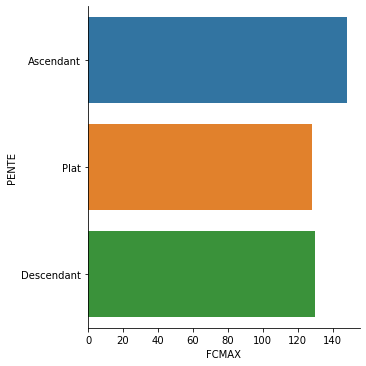

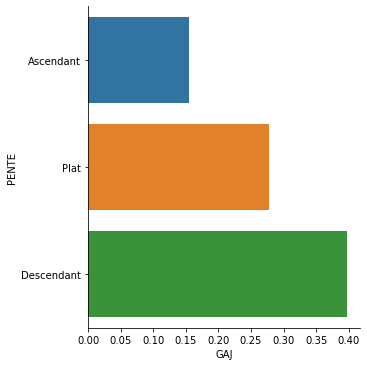

In [74]:
sns.catplot(x="AGE", y="PENTE", kind="bar", data=data, ci=None)
sns.catplot(x="PAR", y="PENTE", kind="bar", data=data, ci=None)
sns.catplot(x="CHOLESTEROL", y="PENTE", kind="bar", data=data, ci=None)
sns.catplot(x="FCMAX", y="PENTE", kind="bar", data=data, ci=None)
sns.catplot(x="GAJ", y="PENTE", kind="bar", data=data, ci=None)
plt.show()

## TESTS STATISTIQUES : VARIABLES QUALITATIVES

In [78]:
import scipy.stats as st

In [77]:
X = "SEXE"
Y = "TDT"
cont = data[[X, Y]].pivot_table(index=X, columns=Y, aggfunc=len).fillna(0).copy().astype(int)
cont

TDT,AA,ASY,AT,DNA
SEXE,,,,
femme,60,70,10,53
homme,113,426,36,150


In [79]:
st_chi2, st_p, st_dof, st_exp = st.chi2_contingency(cont)

In [80]:
st_chi2

36.87917751378357

C'est ce nombre de degrés de liberté qui sera utilisé par scipy.stats pour calculer la loi suivie et donc calculer la p-value

In [81]:
st_dof

3

**P-Value**

Cette valeur nous permet de décider si deux variables sont indépendantes ou non en se fixant un seuil de décision.

Scipy.stats calcule lui-même le nombre de degrés de liberté à partir du tableau de contingence. Cela permet ensuite de calculer la pvaleur, en "observant" la courbe de densité de la loi du khi2 à k degrés de liberté.

L'hypothèse H0 est que les variables sont indépendantes entre elles

In [82]:
st_p

4.880336281360552e-08

Nous pouvons rejeter H0. On rejette donc l'indépendance des deux variables.

In [88]:
X = "SEXE"
Y = "ECG"
cont2 = data[[X, Y]].pivot_table(index=X, columns=Y, aggfunc=len).fillna(0).copy().astype(int)
cont2

ECG,LVH,Normal,ST
SEXE,,,
femme,47,118,28
homme,141,434,150


In [90]:
st_chi2, st_p, st_dof, st_exp = st.chi2_contingency(cont2)
print(st_chi2)
print(st_p)

4.835488217351421
0.08912244139807841


Nous pouvons accepter H0. On accepte donc l'indépendance des deux variables.

In [91]:
X = "SEXE"
Y = "ANGINE"
cont3 = data[[X, Y]].pivot_table(index=X, columns=Y, aggfunc=len).fillna(0).copy().astype(int)
cont3

ANGINE,Non,Oui
SEXE,,
femme,150,43
homme,397,328


In [93]:
st_chi2, st_p, st_dof, st_exp = st.chi2_contingency(cont3)
print(st_chi2)
print(st_p)

32.42516960570875
1.2387163558796499e-08


Nous pouvons rejeter H0. On rejette donc l'indépendance des deux variables.

In [95]:
X = "SEXE"
Y = "PENTE"
cont4 = data[[X, Y]].pivot_table(index=X, columns=Y, aggfunc=len).fillna(0).copy().astype(int)
cont4

PENTE,Ascendant,Descendant,Plat
SEXE,,,
femme,111,7,75
homme,284,56,385


In [96]:
st_chi2, st_p, st_dof, st_exp = st.chi2_contingency(cont4)
print(st_chi2)
print(st_p)

21.815310184744973
1.83174739624214e-05


Nous pouvons rejeter H0. On rejette donc l'indépendance des deux variables.

In [121]:
X = "ECG"
Y = "TDT"
cont5 = data[[X, Y]].pivot_table(index=X, columns=Y, aggfunc=len).fillna(0).copy().astype(int)
st_chi2, st_p, st_dof, st_exp = st.chi2_contingency(cont5)
print(st_chi2)
print(st_p)

19.360106674257352
0.003596780905759451


Nous pouvons rejeter H0. On rejette donc l'indépendance des deux variables.

In [125]:
X = "ANGINE"
Y = "TDT"
cont6 = data[[X, Y]].pivot_table(index=X, columns=Y, aggfunc=len).fillna(0).copy().astype(int)
st_chi2, st_p, st_dof, st_exp = st.chi2_contingency(cont6)
print(st_chi2)
print(st_p)

179.27327764596896
1.2659099121635848e-38


Nous pouvons rejeter H0. On rejette donc l'indépendance des deux variables.

In [126]:
X = "PENTE"
Y = "TDT"
cont7 = data[[X, Y]].pivot_table(index=X, columns=Y, aggfunc=len).fillna(0).copy().astype(int)
st_chi2, st_p, st_dof, st_exp = st.chi2_contingency(cont7)
print(st_chi2)
print(st_p)

156.88391948842818
2.705381063690865e-31


Nous pouvons rejeter H0. On rejette donc l'indépendance des deux variables.

In [127]:
X = "ANGINE"
Y = "ECG"
cont8 = data[[X, Y]].pivot_table(index=X, columns=Y, aggfunc=len).fillna(0).copy().astype(int)
st_chi2, st_p, st_dof, st_exp = st.chi2_contingency(cont8)
print(st_chi2)
print(st_p)

10.620317923311472
0.004941141203261243


Nous pouvons rejeter H0. On rejette donc l'indépendance des deux variables.

In [128]:
X = "PENTE"
Y = "ECG"
cont8 = data[[X, Y]].pivot_table(index=X, columns=Y, aggfunc=len).fillna(0).copy().astype(int)
st_chi2, st_p, st_dof, st_exp = st.chi2_contingency(cont8)
print(st_chi2)
print(st_p)

7.697833028770749
0.10329552404263315


Nous pouvons accepter H0. On accepte donc l'indépendance des deux variables.

In [143]:
X = "ANGINE"
Y = "PENTE"
cont9 = data[[X, Y]].pivot_table(index=X, columns=Y, aggfunc=len).copy().astype(int)
st_chi2, st_p, st_dof, st_exp = st.chi2_contingency(cont9)
print(st_chi2)
print(st_p)

191.42852964558256
2.70285624656344e-42


Nous pouvons accepter H0. On accepte donc l'indépendance des deux variables.

### COMPARAISON AVEC LA VARIABLE CIBLE COEUR 

In [149]:
from scipy.stats import chi2_contingency 

In [150]:
for col in data.select_dtypes(object):
    if col not in 'COEUR':
        matrice=pd.crosstab(data['COEUR'],data[col])
        khi2, pval, ddl, contingent_theorique = chi2_contingency(matrice)
        print(matrice)
        print(pval)
        print('')
        print('')

SEXE   femme  homme
COEUR              
0        143    267
1         50    458
4.597617450809164e-20


TDT     AA  ASY  AT  DNA
COEUR                   
0      149  104  26  131
1       24  392  20   72
8.08372842808765e-58


ECG    LVH  Normal   ST
COEUR                  
0       82     267   61
1      106     285  117
0.0042292328167544925


ANGINE  Non  Oui
COEUR           
0       355   55
1       192  316
2.907808387659878e-50


PENTE  Ascendant  Descendant  Plat
COEUR                             
0            317          14    79
1             78          49   381
5.167637689470128e-78




Les variables PENTE , ANGINE , TDT , SEXE sont liées à la variable cible 

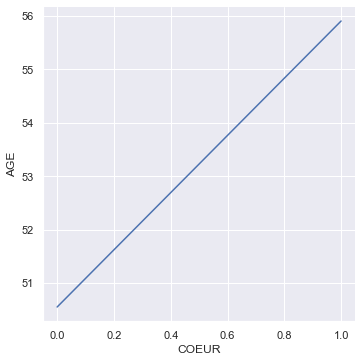

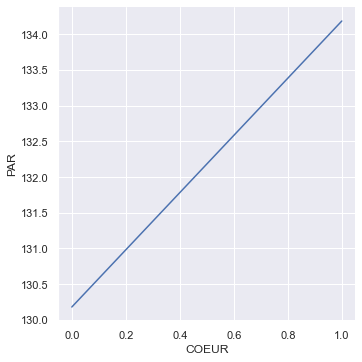

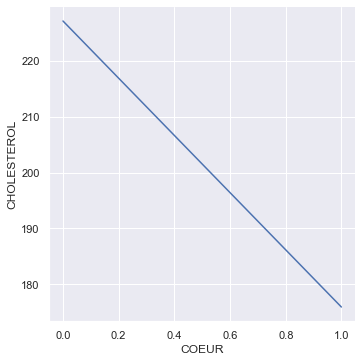

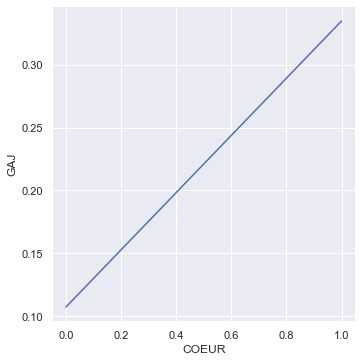

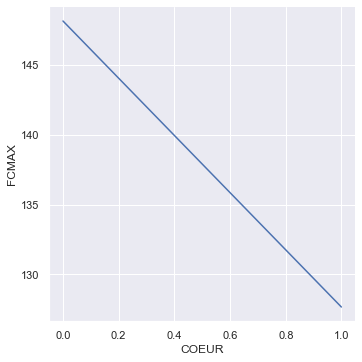

In [170]:
sns.relplot(x="COEUR", y="AGE",kind='line', data=data, ci=None);
sns.relplot(x="COEUR", y="PAR",kind='line', data=data, ci=None);
sns.relplot(x="COEUR", y="CHOLESTEROL",kind='line', data=data, ci=None);
sns.relplot(x="COEUR", y="GAJ",kind='line', data=data, ci=None);
sns.relplot(x="COEUR", y="FCMAX",kind='line', data=data, ci=None);

In [171]:
pearsonr(data['COEUR'],data['AGE'])

(0.28203850581899687, 3.007953240047636e-18)

In [172]:
pearsonr(data['COEUR'],data['PAR'])

(0.10758898037140391, 0.001095314585171513)

In [173]:
pearsonr(data['COEUR'],data['CHOLESTEROL'])

(-0.23274063892701108, 9.308308883526296e-13)

In [174]:
pearsonr(data['COEUR'],data['GAJ'])

(0.2672911861102979, 1.7535980103286795e-16)

In [175]:
pearsonr(data['COEUR'],data['FCMAX'])

(-0.4004207694631897, 1.1377859840272116e-36)

Les variables FCMAX , GAJ , CHOLESTEROL , AGE sont liées à la variable cible 

In [256]:
from sklearn.feature_selection import mutual_info_regression

In [257]:
# Create mutual info scores

def make_mi_scores (df_norm, y):
    mi_scores = mutual_info_regression(df_norm, y)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=data.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(df_norm, y)

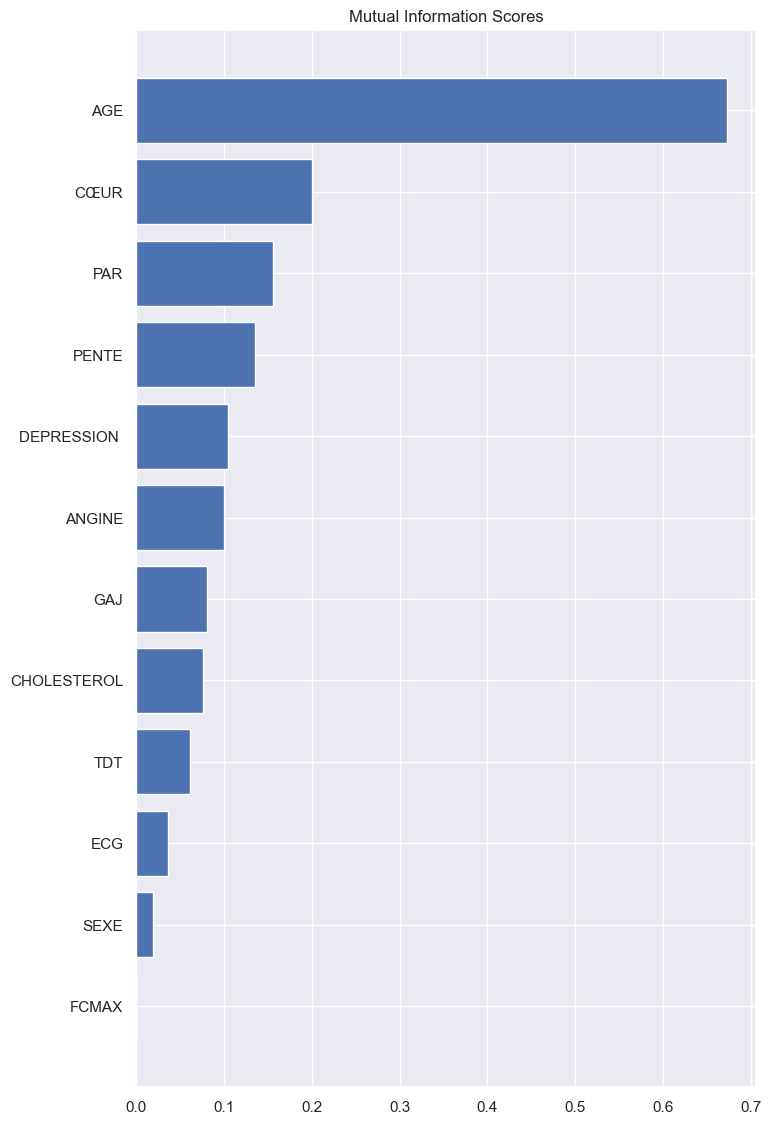

In [258]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")
    
plt.figure(dpi=100, figsize=(8,14))
plot_mi_scores(mi_scores)

## Preprocessing 

In [222]:
data.head(10)

,AGE,SEXE,TDT,PAR,CHOLESTEROL,GAJ,ECG,FCMAX,ANGINE,DEPRESSION,PENTE,CŒUR
0,40,homme,AA,140,289,0,Normal,172,Non,0.0,Ascendant,0
1,49,femme,DNA,160,180,0,Normal,156,Non,1.0,Plat,1
2,37,homme,AA,130,283,0,ST,98,Non,0.0,Ascendant,0
3,48,femme,ASY,138,214,0,Normal,108,Oui,1.5,Plat,1
4,54,homme,DNA,150,195,0,Normal,122,Non,0.0,Ascendant,0
5,39,homme,DNA,120,339,0,Normal,170,Non,0.0,Ascendant,0
6,45,femme,AA,130,237,0,Normal,170,Non,0.0,Ascendant,0
7,54,homme,AA,110,208,0,Normal,142,Non,0.0,Ascendant,0
8,37,homme,ASY,140,207,0,Normal,130,Oui,1.5,Plat,1
9,48,femme,AA,120,284,0,Normal,120,Non,0.0,Ascendant,0


In [223]:
df = data.copy()

In [224]:
def encodage(df):
    code = {'homme':0,
            'femme':1,
            'ASY':1,
            'AA':2,
            'AT':3,
            'DNA':4,
            'ST':1,
            'Normal':2,
            'LVH':3,
            'Non':0,
            'Oui':1,
            'Descendant':0,
            'Plat':1,
            'Ascendant':2}
    
    for col in df.select_dtypes('object').columns:
        df.loc[:,col] = df[col].map(code)
        
    return df

In [225]:
df = encodage(df)

In [227]:
from sklearn.preprocessing import StandardScaler, RobustScaler

In [452]:
df.head(10)

,AGE,SEXE,TDT,PAR,CHOLESTEROL,GAJ,ECG,FCMAX,ANGINE,DEPRESSION,PENTE
0,40,0,2,140,289,0,2,172,0,0.0,2
1,49,1,4,160,180,0,2,156,0,1.0,1
2,37,0,2,130,283,0,1,98,0,0.0,2
3,48,1,1,138,214,0,2,108,1,1.5,1
4,54,0,4,150,195,0,2,122,0,0.0,2
5,39,0,4,120,339,0,2,170,0,0.0,2
6,45,1,2,130,237,0,2,170,0,0.0,2
7,54,0,2,110,208,0,2,142,0,0.0,2
8,37,0,1,140,207,0,2,130,1,1.5,1
9,48,1,2,120,284,0,2,120,0,0.0,2


In [243]:
df.drop('CŒUR', axis=1, inplace=True)

In [387]:
df.head()

,AGE,SEXE,TDT,PAR,CHOLESTEROL,GAJ,ECG,FCMAX,ANGINE,DEPRESSION,PENTE
0,40,0,2,140,289,0,2,172,0,0.0,2
1,49,1,4,160,180,0,2,156,0,1.0,1
2,37,0,2,130,283,0,1,98,0,0.0,2
3,48,1,1,138,214,0,2,108,1,1.5,1
4,54,0,4,150,195,0,2,122,0,0.0,2


In [465]:
df_quali = df.loc[:, ~df.columns.isin(['AGE', 'PAR','CHOLESTEROL','GAJ','FCMAX','DEPRESSION '])]

df_quali

,SEXE,TDT,ECG,ANGINE,PENTE
0,0,2,2,0,2
1,1,4,2,0,1
2,0,2,1,0,2
3,1,1,2,1,1
4,0,4,2,0,2
...,...,...,...,...,...
913,0,3,2,0,1
914,0,1,2,0,1
915,0,1,2,1,1
916,1,2,3,0,1


In [443]:
df_quanti = df.loc[:, ~df.columns.isin(['SEXE', 'TDT','ANGINE','PENTE','ECG'])]

df_quanti

,AGE,PAR,CHOLESTEROL,GAJ,FCMAX,DEPRESSION
0,40,140,289,0,172,0.0
1,49,160,180,0,156,1.0
2,37,130,283,0,98,0.0
3,48,138,214,0,108,1.5
4,54,150,195,0,122,0.0
...,...,...,...,...,...,...
913,45,110,264,0,132,1.2
914,68,144,193,1,141,3.4
915,57,130,131,0,115,1.2
916,57,130,236,0,174,0.0


In [444]:
# Standardisation des valeurs quantitatives
df_stdscl = StandardScaler().fit_transform(df_quanti)
df_stdscl

array([[-1.4331398 ,  0.41090889,  0.82507026, -0.55134134,  1.38292822,
        -0.83243239],
       [-0.47848359,  1.49175234, -0.17196105, -0.55134134,  0.75415714,
         0.10566353],
       [-1.75135854, -0.12951283,  0.7701878 , -0.55134134, -1.52513802,
        -0.83243239],
       ...,
       [ 0.37009972, -0.12951283, -0.62016778, -0.55134134, -0.85706875,
         0.29328271],
       [ 0.37009972, -0.12951283,  0.34027522, -0.55134134,  1.4615246 ,
        -0.83243239],
       [-1.64528563,  0.30282455, -0.21769643, -0.55134134,  1.42222641,
        -0.83243239]])

In [459]:
df_quanti = pd.DataFrame(df_stdscl, columns = ['AGE', 'PAR','CHOLESTEROL','GAJ','FCMAX','DEPRESSION'])
df_quanti

,AGE,PAR,CHOLESTEROL,GAJ,FCMAX,DEPRESSION
0,-1.433140,0.410909,0.825070,-0.551341,1.382928,-0.832432
1,-0.478484,1.491752,-0.171961,-0.551341,0.754157,0.105664
2,-1.751359,-0.129513,0.770188,-0.551341,-1.525138,-0.832432
3,-0.584556,0.302825,0.139040,-0.551341,-1.132156,0.574711
4,0.051881,0.951331,-0.034755,-0.551341,-0.581981,-0.832432
...,...,...,...,...,...,...
913,-0.902775,-1.210356,0.596393,-0.551341,-0.188999,0.293283
914,1.536902,0.627078,-0.053049,1.813758,0.164684,2.357094
915,0.370100,-0.129513,-0.620168,-0.551341,-0.857069,0.293283
916,0.370100,-0.129513,0.340275,-0.551341,1.461525,-0.832432


In [466]:
df_norm = pd.merge(df_quanti.reset_index(), df_quali.reset_index(), how='outer',left_index= True, right_index=True)
df_norm

,index_x,AGE,PAR,CHOLESTEROL,GAJ,FCMAX,DEPRESSION,index_y,SEXE,TDT,ECG,ANGINE,PENTE
0,0,-1.433140,0.410909,0.825070,-0.551341,1.382928,-0.832432,0,0,2,2,0,2
1,1,-0.478484,1.491752,-0.171961,-0.551341,0.754157,0.105664,1,1,4,2,0,1
2,2,-1.751359,-0.129513,0.770188,-0.551341,-1.525138,-0.832432,2,0,2,1,0,2
3,3,-0.584556,0.302825,0.139040,-0.551341,-1.132156,0.574711,3,1,1,2,1,1
4,4,0.051881,0.951331,-0.034755,-0.551341,-0.581981,-0.832432,4,0,4,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,913,-0.902775,-1.210356,0.596393,-0.551341,-0.188999,0.293283,913,0,3,2,0,1
914,914,1.536902,0.627078,-0.053049,1.813758,0.164684,2.357094,914,0,1,2,0,1
915,915,0.370100,-0.129513,-0.620168,-0.551341,-0.857069,0.293283,915,0,1,2,1,1
916,916,0.370100,-0.129513,0.340275,-0.551341,1.461525,-0.832432,916,1,2,3,0,1


In [467]:
df_norm.drop(['index_x','index_y'], axis = 1)

,AGE,PAR,CHOLESTEROL,GAJ,FCMAX,DEPRESSION,SEXE,TDT,ECG,ANGINE,PENTE
0,-1.433140,0.410909,0.825070,-0.551341,1.382928,-0.832432,0,2,2,0,2
1,-0.478484,1.491752,-0.171961,-0.551341,0.754157,0.105664,1,4,2,0,1
2,-1.751359,-0.129513,0.770188,-0.551341,-1.525138,-0.832432,0,2,1,0,2
3,-0.584556,0.302825,0.139040,-0.551341,-1.132156,0.574711,1,1,2,1,1
4,0.051881,0.951331,-0.034755,-0.551341,-0.581981,-0.832432,0,4,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...
913,-0.902775,-1.210356,0.596393,-0.551341,-0.188999,0.293283,0,3,2,0,1
914,1.536902,0.627078,-0.053049,1.813758,0.164684,2.357094,0,1,2,0,1
915,0.370100,-0.129513,-0.620168,-0.551341,-0.857069,0.293283,0,1,2,1,1
916,0.370100,-0.129513,0.340275,-0.551341,1.461525,-0.832432,1,2,3,0,1


In [472]:
df_norm

,index_x,AGE,PAR,CHOLESTEROL,GAJ,FCMAX,DEPRESSION,index_y,SEXE,TDT,ECG,ANGINE,Cardiaque,PENTE
0,0,-1.433140,0.410909,0.825070,-0.551341,1.382928,-0.832432,0,0,2,2,0,0,2
1,1,-0.478484,1.491752,-0.171961,-0.551341,0.754157,0.105664,1,1,4,2,0,1,1
2,2,-1.751359,-0.129513,0.770188,-0.551341,-1.525138,-0.832432,2,0,2,1,0,0,2
3,3,-0.584556,0.302825,0.139040,-0.551341,-1.132156,0.574711,3,1,1,2,1,1,1
4,4,0.051881,0.951331,-0.034755,-0.551341,-0.581981,-0.832432,4,0,4,2,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,913,-0.902775,-1.210356,0.596393,-0.551341,-0.188999,0.293283,913,0,3,2,0,1,1
914,914,1.536902,0.627078,-0.053049,1.813758,0.164684,2.357094,914,0,1,2,0,1,1
915,915,0.370100,-0.129513,-0.620168,-0.551341,-0.857069,0.293283,915,0,1,2,1,1,1
916,916,0.370100,-0.129513,0.340275,-0.551341,1.461525,-0.832432,916,1,2,3,0,1,1


In [473]:
df_norm = df_norm.drop(['index_x','index_y'], axis = 1)

In [474]:
df_norm

,AGE,PAR,CHOLESTEROL,GAJ,FCMAX,DEPRESSION,SEXE,TDT,ECG,ANGINE,Cardiaque,PENTE
0,-1.433140,0.410909,0.825070,-0.551341,1.382928,-0.832432,0,2,2,0,0,2
1,-0.478484,1.491752,-0.171961,-0.551341,0.754157,0.105664,1,4,2,0,1,1
2,-1.751359,-0.129513,0.770188,-0.551341,-1.525138,-0.832432,0,2,1,0,0,2
3,-0.584556,0.302825,0.139040,-0.551341,-1.132156,0.574711,1,1,2,1,1,1
4,0.051881,0.951331,-0.034755,-0.551341,-0.581981,-0.832432,0,4,2,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
913,-0.902775,-1.210356,0.596393,-0.551341,-0.188999,0.293283,0,3,2,0,1,1
914,1.536902,0.627078,-0.053049,1.813758,0.164684,2.357094,0,1,2,0,1,1
915,0.370100,-0.129513,-0.620168,-0.551341,-0.857069,0.293283,0,1,2,1,1,1
916,0.370100,-0.129513,0.340275,-0.551341,1.461525,-0.832432,1,2,3,0,1,1


In [478]:
df_norm = df_norm.drop(['Cardiaque'], axis = 1)

In [479]:
df_norm

,AGE,PAR,CHOLESTEROL,GAJ,FCMAX,DEPRESSION,SEXE,TDT,ECG,ANGINE,PENTE
0,-1.433140,0.410909,0.825070,-0.551341,1.382928,-0.832432,0,2,2,0,2
1,-0.478484,1.491752,-0.171961,-0.551341,0.754157,0.105664,1,4,2,0,1
2,-1.751359,-0.129513,0.770188,-0.551341,-1.525138,-0.832432,0,2,1,0,2
3,-0.584556,0.302825,0.139040,-0.551341,-1.132156,0.574711,1,1,2,1,1
4,0.051881,0.951331,-0.034755,-0.551341,-0.581981,-0.832432,0,4,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...
913,-0.902775,-1.210356,0.596393,-0.551341,-0.188999,0.293283,0,3,2,0,1
914,1.536902,0.627078,-0.053049,1.813758,0.164684,2.357094,0,1,2,0,1
915,0.370100,-0.129513,-0.620168,-0.551341,-0.857069,0.293283,0,1,2,1,1
916,0.370100,-0.129513,0.340275,-0.551341,1.461525,-0.832432,1,2,3,0,1


In [483]:
df_norm.insert(11, column='Cardiaque', value=y, allow_duplicates=False)

In [484]:
df_norm

,AGE,PAR,CHOLESTEROL,GAJ,FCMAX,DEPRESSION,SEXE,TDT,ECG,ANGINE,PENTE,Cardiaque
0,-1.433140,0.410909,0.825070,-0.551341,1.382928,-0.832432,0,2,2,0,2,0
1,-0.478484,1.491752,-0.171961,-0.551341,0.754157,0.105664,1,4,2,0,1,1
2,-1.751359,-0.129513,0.770188,-0.551341,-1.525138,-0.832432,0,2,1,0,2,0
3,-0.584556,0.302825,0.139040,-0.551341,-1.132156,0.574711,1,1,2,1,1,1
4,0.051881,0.951331,-0.034755,-0.551341,-0.581981,-0.832432,0,4,2,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,-0.902775,-1.210356,0.596393,-0.551341,-0.188999,0.293283,0,3,2,0,1,1
914,1.536902,0.627078,-0.053049,1.813758,0.164684,2.357094,0,1,2,0,1,1
915,0.370100,-0.129513,-0.620168,-0.551341,-0.857069,0.293283,0,1,2,1,1,1
916,0.370100,-0.129513,0.340275,-0.551341,1.461525,-0.832432,1,2,3,0,1,1


In [475]:
y = df_norm['Cardiaque']
y

0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: Cardiaque, Length: 918, dtype: int64

In [476]:
X = df_norm.drop('Cardiaque', axis=1, inplace=False)

In [485]:
X

,AGE,PAR,CHOLESTEROL,GAJ,FCMAX,DEPRESSION,SEXE,TDT,ECG,ANGINE,PENTE
0,-1.433140,0.410909,0.825070,-0.551341,1.382928,-0.832432,0,2,2,0,2
1,-0.478484,1.491752,-0.171961,-0.551341,0.754157,0.105664,1,4,2,0,1
2,-1.751359,-0.129513,0.770188,-0.551341,-1.525138,-0.832432,0,2,1,0,2
3,-0.584556,0.302825,0.139040,-0.551341,-1.132156,0.574711,1,1,2,1,1
4,0.051881,0.951331,-0.034755,-0.551341,-0.581981,-0.832432,0,4,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...
913,-0.902775,-1.210356,0.596393,-0.551341,-0.188999,0.293283,0,3,2,0,1
914,1.536902,0.627078,-0.053049,1.813758,0.164684,2.357094,0,1,2,0,1
915,0.370100,-0.129513,-0.620168,-0.551341,-0.857069,0.293283,0,1,2,1,1
916,0.370100,-0.129513,0.340275,-0.551341,1.461525,-0.832432,1,2,3,0,1


## Modélisation

In [393]:
import warnings 
warnings.filterwarnings('ignore')

In [234]:
from sklearn.model_selection import train_test_split

In [486]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print('Train set:', X_train.shape)
print('Test set:', X_test.shape)

Train set: (734, 11)
Test set: (184, 11)


In [498]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import PolynomialFeatures
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import RidgeClassifier

In [488]:
preprocessor = make_pipeline(PolynomialFeatures(2, include_bias=False), SelectKBest(f_classif, k=10))

In [589]:
RandomForest = make_pipeline(preprocessor, RandomForestClassifier(random_state=0))
AdaBoost = make_pipeline(preprocessor, AdaBoostClassifier(random_state=0))
SVM = make_pipeline(preprocessor, SVC(kernel = 'rbf',random_state=0))
KNN = make_pipeline(preprocessor, KNeighborsClassifier())
GNB = make_pipeline(preprocessor, GaussianNB())
QDA = make_pipeline(preprocessor, QuadraticDiscriminantAnalysis())
MLP = make_pipeline(preprocessor, MLPClassifier(alpha=1, max_iter=1000)) 
SGDC = make_pipeline(preprocessor, SGDClassifier(loss="hinge", penalty="l2"))
PAC = make_pipeline(preprocessor, PassiveAggressiveClassifier(max_iter=1000, random_state=0, tol=1e-3)) 
RGC = make_pipeline(preprocessor, RidgeClassifier()) 

In [590]:
dict_of_models = {'RandomForest': RandomForest,
                  'AdaBoost' : AdaBoost,
                  'SVM': SVM,
                  'KNN': KNN,
                  "Neural Net": MLP,
                  "Naive Bayes" : GNB,
                  "QDA": QDA,
                  "SGD Classifier": SGDC,
                  "Passive Aggressive Classifier": PAC,
                  "Ridge Classifier": RGC
                 }

## Evaluation

In [286]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve

In [505]:
def evaluation(model):
    
    model.fit(X_train, y_train)
    ypred = model.predict(X_test)
    
    print(confusion_matrix(y_test, ypred))
    print(classification_report(y_test, ypred))
    
    N, train_score, val_score = learning_curve(model, X_train, y_train,
                                              cv=4, scoring='f1',
                                               train_sizes=np.linspace(0.1, 1, 10))
    
    
    plt.figure(figsize=(12, 8))
    plt.plot(N, train_score.mean(axis=1), label='train score')
    plt.plot(N, val_score.mean(axis=1), label='validation score')
    plt.legend()

RandomForest
[[57 20]
 [16 91]]
              precision    recall  f1-score   support

           0       0.78      0.74      0.76        77
           1       0.82      0.85      0.83       107

    accuracy                           0.80       184
   macro avg       0.80      0.80      0.80       184
weighted avg       0.80      0.80      0.80       184

AdaBoost
[[58 19]
 [21 86]]
              precision    recall  f1-score   support

           0       0.73      0.75      0.74        77
           1       0.82      0.80      0.81       107

    accuracy                           0.78       184
   macro avg       0.78      0.78      0.78       184
weighted avg       0.78      0.78      0.78       184

SVM
[[54 23]
 [13 94]]
              precision    recall  f1-score   support

           0       0.81      0.70      0.75        77
           1       0.80      0.88      0.84       107

    accuracy                           0.80       184
   macro avg       0.80      0.79      0.79  

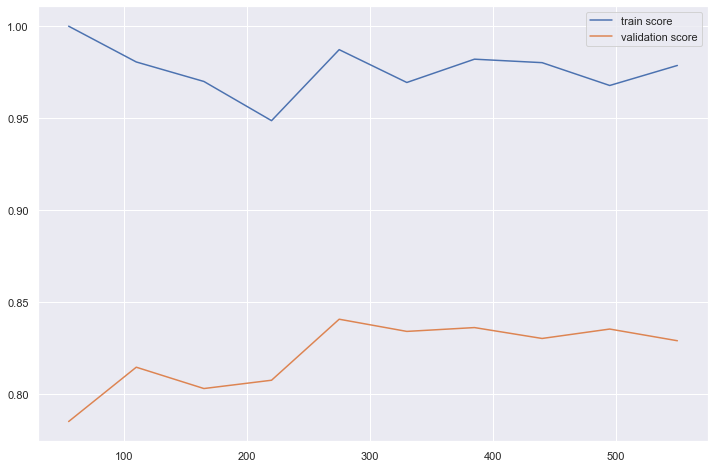

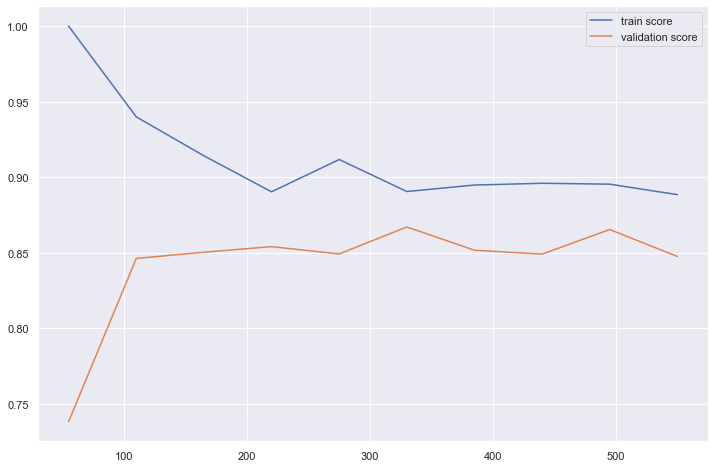

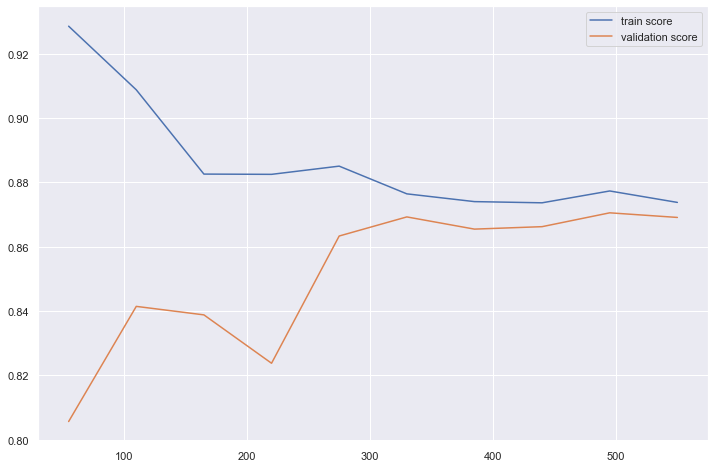

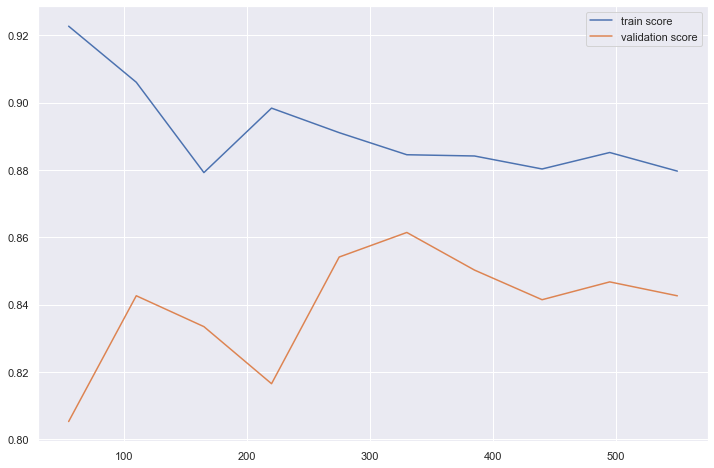

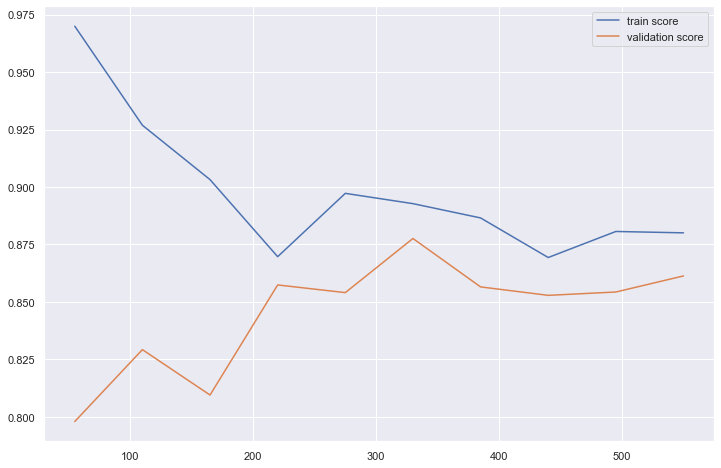

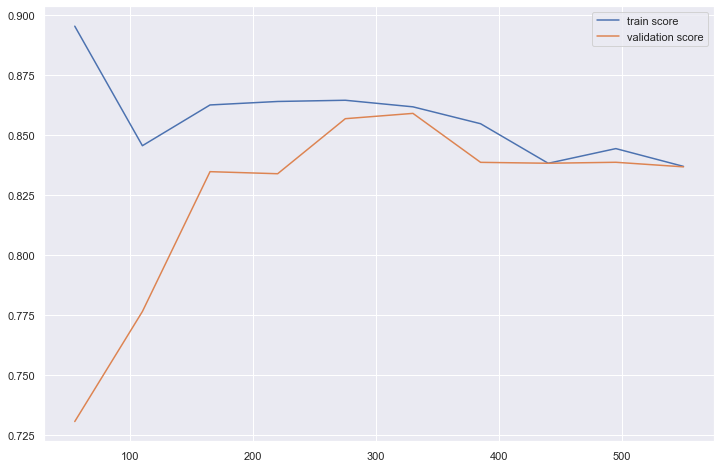

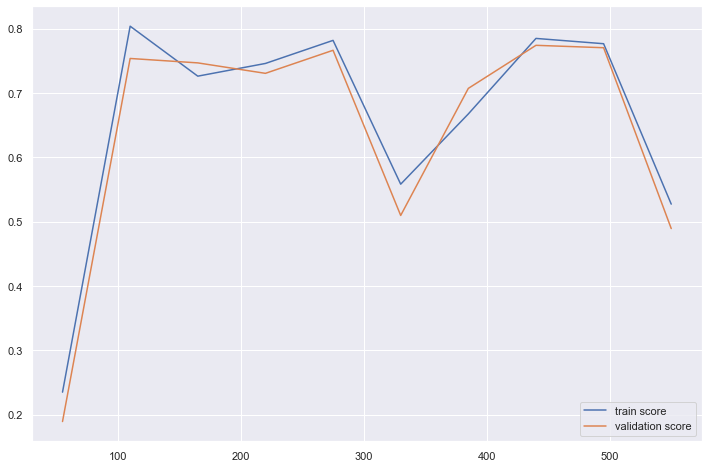

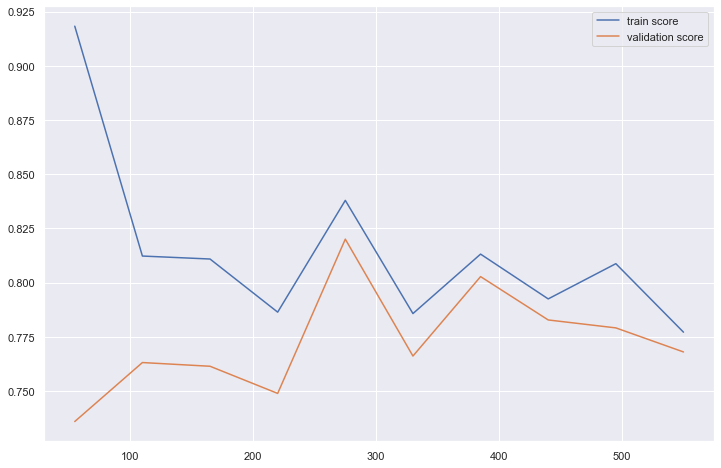

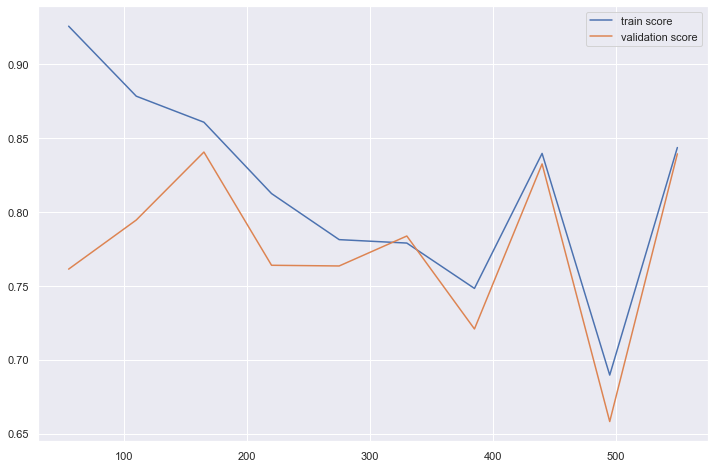

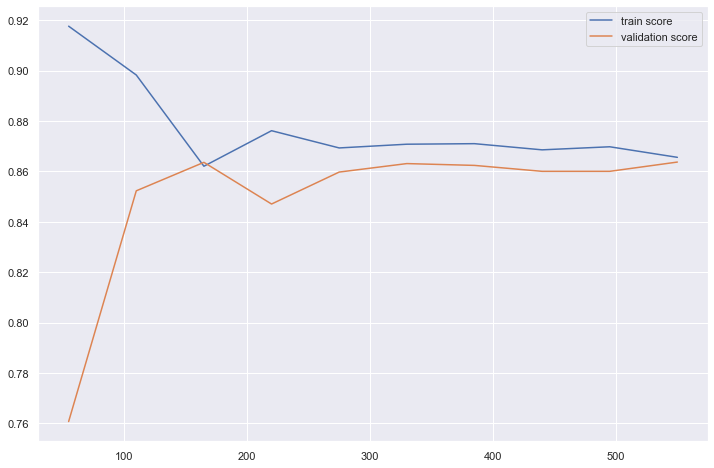

In [591]:
for name, model in dict_of_models.items():
    print(name)
    evaluation(model)

## OPTIMISATION

In [521]:
model = KNeighborsClassifier(n_neighbors=1)

model.fit(X_train, y_train)

print('train score:', model.score(X_train, y_train))
print('test score:', model.score(X_test, y_test))

train score: 1.0
test score: 0.7989130434782609


In [508]:
from sklearn.model_selection import cross_val_score

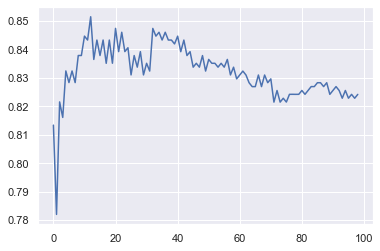

In [593]:
val_score = []
for k in range(1, 100):
    score = cross_val_score(KNeighborsClassifier(k), X_train, y_train, cv=5).mean()
    val_score.append(score)

plt.plot(val_score)
plt.show()

In [511]:
from sklearn.model_selection import validation_curve

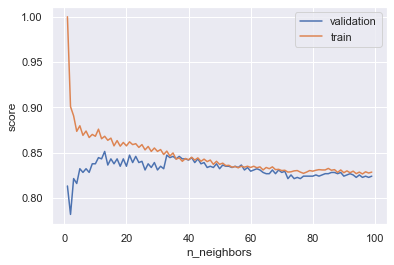

In [595]:
model = KNeighborsClassifier()
k = np.arange(1, 100)

train_score, val_score = validation_curve(model, X_train, y_train,
                                          'n_neighbors', k, cv=5)

plt.plot(k, val_score.mean(axis=1), label='validation')
plt.plot(k, train_score.mean(axis=1), label='train')

plt.ylabel('score')
plt.xlabel('n_neighbors')
plt.legend()
plt.show()

In [513]:
from sklearn.model_selection import GridSearchCV

In [600]:
param_grid = {'n_neighbors': np.arange(10, 30),
              'metric': ['euclidean', 'manhattan']}

grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)

grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29])})

In [601]:
print(grid.best_score_)
print(grid.best_params_)

0.8705526046034852
{'metric': 'manhattan', 'n_neighbors': 29}


In [605]:
model = grid.best_estimator_
model.score(X_test, y_test)

0.842391304347826

In [516]:
from sklearn.metrics import confusion_matrix

In [606]:
confusion_matrix(y_test, model.predict(X_test))

array([[64, 13],
       [16, 91]], dtype=int64)

[[64 13]
 [16 91]]
              precision    recall  f1-score   support

           0       0.80      0.83      0.82        77
           1       0.88      0.85      0.86       107

    accuracy                           0.84       184
   macro avg       0.84      0.84      0.84       184
weighted avg       0.84      0.84      0.84       184



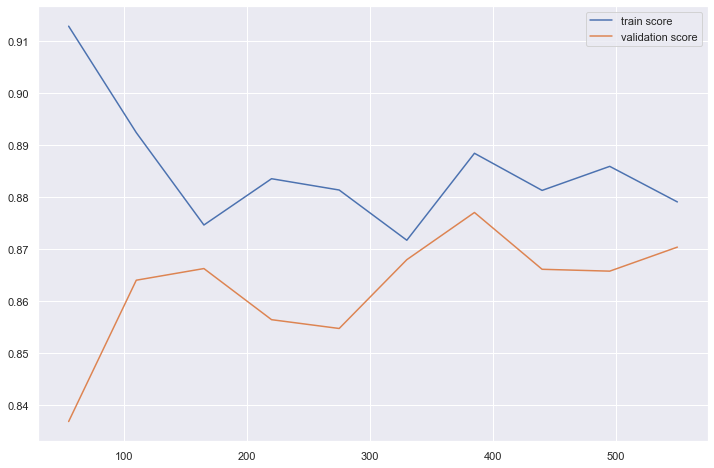

In [607]:
evaluation(grid.best_estimator_)

In [528]:
from sklearn.model_selection import learning_curve

[ 58 117 176 234 293 352 410 469 528 587]


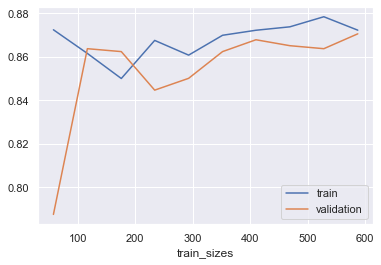

In [608]:
N, train_score, val_score = learning_curve(model, X_train, y_train,
                                           train_sizes=np.linspace(0.1, 1, 10), cv=5)

print(N)
plt.plot(N, train_score.mean(axis=1), label='train')
plt.plot(N, val_score.mean(axis=1), label='validation')
plt.xlabel('train_sizes')
plt.legend()
plt.show()

-----------------------------------------------------------------------------------------------------